C:\Users\THE-NISAL\AppData\Local\Temp\ipykernel_8572\3290636793.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='category', y='total_sales', order=order, palette='Set2', showfliers=False)


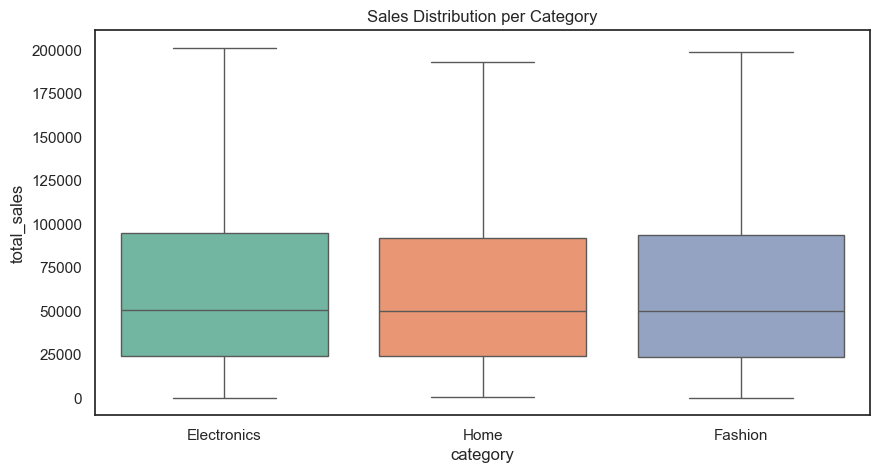

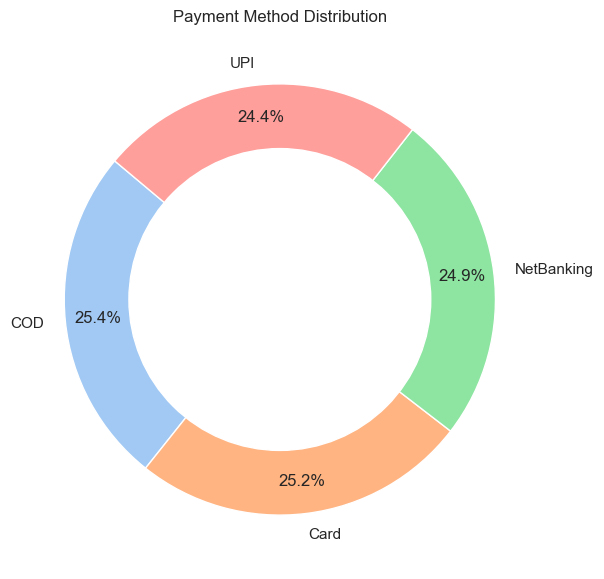

<Figure size 1000x500 with 0 Axes>

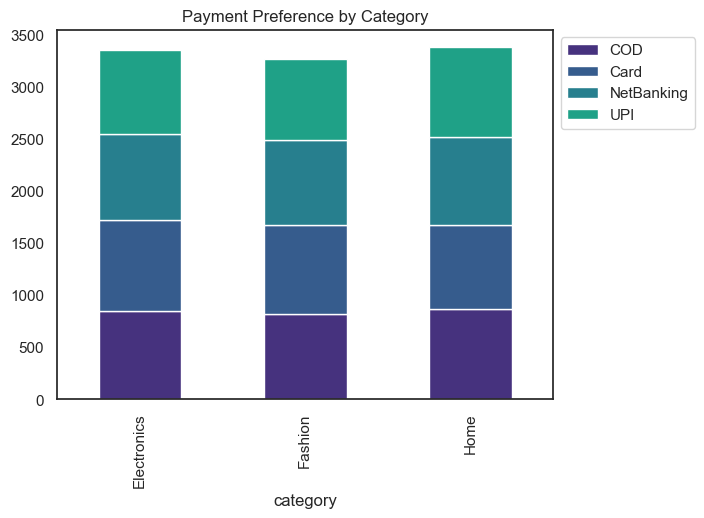

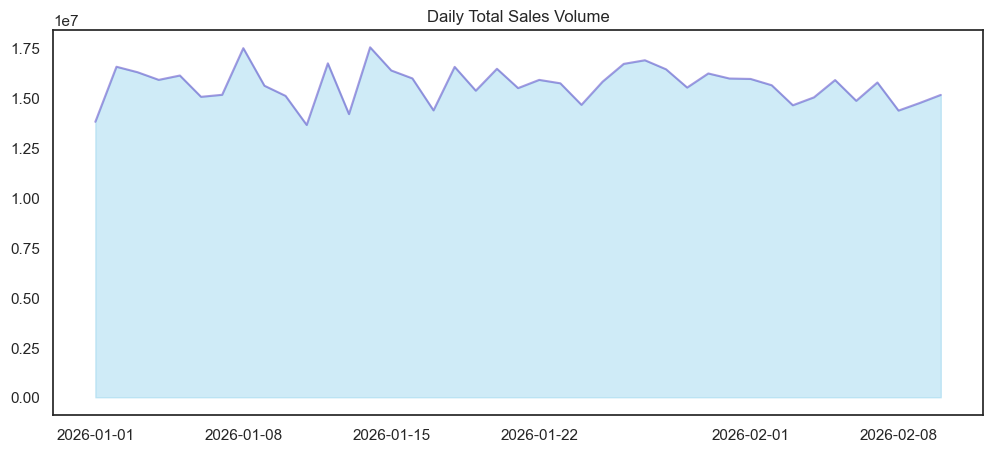

C:\Users\THE-NISAL\AppData\Local\Temp\ipykernel_8572\3290636793.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='category', y='unit_price', palette='muted')


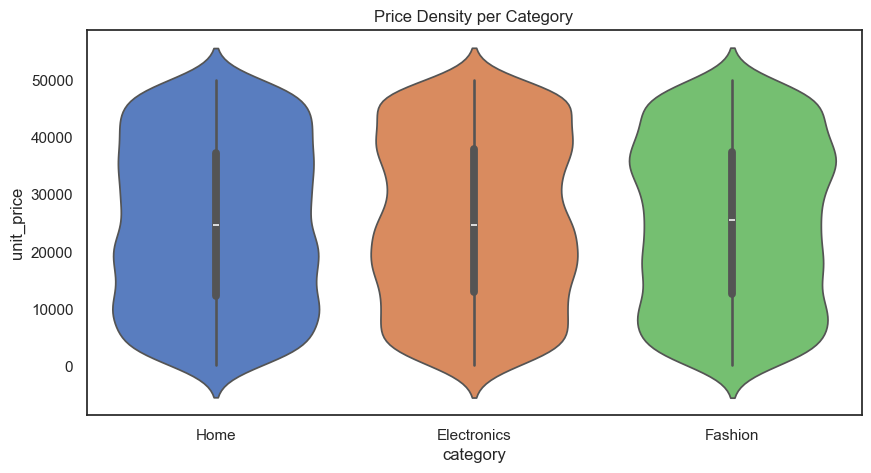

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs('output_images', exist_ok=True)

df = pd.read_csv('amazon_sales_dataset.csv')
df['order_date'] = pd.to_datetime(df['order_date'])

sns.set_theme(style="white")

# Box Plot
plt.figure(figsize=(10, 5))
order = df.groupby('category')['total_sales'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='category', y='total_sales', order=order, palette='Set2', showfliers=False)
plt.title('Sales Distribution per Category')
plt.savefig('output_images/01_sales_boxplot.png')
plt.show()

# Donut Chart
plt.figure(figsize=(7, 7))
counts = df['payment_method'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), pctdistance=0.85)
plt.gca().add_artist(plt.Circle((0,0), 0.70, fc='white'))
plt.title('Payment Method Distribution')
plt.savefig('output_images/02_payment_donut.png')
plt.show()

# GRAPH 3: Stacked Bar
plt.figure(figsize=(10, 5))
cat_pay = pd.crosstab(df['category'], df['payment_method'])
cat_pay.plot(kind='bar', stacked=True, color=sns.color_palette('viridis'))
plt.title('Payment Preference by Category')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('output_images/03_stacked_payment.png')
plt.show()

# Area Chart
plt.figure(figsize=(12, 5))
daily = df.groupby('order_date')['total_sales'].sum().sort_index()
plt.fill_between(daily.index, daily.values, color="skyblue", alpha=0.4)
plt.plot(daily.index, daily.values, color="Slateblue", alpha=0.6)
plt.title('Daily Total Sales Volume')
plt.savefig('output_images/04_area_sales.png')
plt.show()

# Violin Plo
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='category', y='unit_price', palette='muted')
plt.title('Price Density per Category')
plt.savefig('output_images/05_violin_price.png')
plt.show()